# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
os.getcwd()

'C:\\Users\\salman_pc\\Documents\\DATASCIENCE(SPRINGBOARD)\\GuidedCapStone\\1588204790_GuidedCapstoneStep6HL.ipynb'

## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [5]:
os.chdir('C:\\Users\\salman_pc\\Documents\\DATASCIENCE(SPRINGBOARD)\\GuidedCapStone\\data')
os.getcwd()

'C:\\Users\\salman_pc\\Documents\\DATASCIENCE(SPRINGBOARD)\\GuidedCapStone\\data'

In [6]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
file="step3_output.csv"
df=pd.read_csv(file)
X=df.drop(['Name','AdultWeekend','state','summit_elev','NightSkiing_ac','fastEight'], axis=1)
y=df.AdultWeekend


In [7]:
y.isnull().sum(axis = 0)

0

In [8]:
X.isnull().sum(axis = 0)

Unnamed: 0           0
vertical_drop        0
base_elev            0
trams                0
fastSixes            0
fastQuads            0
quad                 0
triple               0
double               0
surface              0
total_chairs         0
Runs                 0
TerrainParks         0
LongestRun_mi        0
SkiableTerrain_ac    0
Snow Making_ac       0
daysOpenLastYear     0
yearsOpen            0
averageSnowfall      0
AdultWeekday         0
projectedDaysOpen    0
clusters             0
dtype: int64

In [9]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X) 
y=y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(explained_variance_score(y_test, y_pred))
mean_absolute_error(y_test, y_pred)

0.5004646736270596


7.576681021978863

## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [10]:
df[df['Name'].str.contains('Mountain')]

,Unnamed: 0,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
3,8,Boreal Mountain Resort,California,7700,500,7200,0,0.0,0,1,...,380.0,200.0,150.000000,54.0,400.000000,49.000000,64.16681,150.000000,200.0,1
6,12,June Mountain,California,10090,2590,7545,0,0.0,0,2,...,1500.0,0.0,115.103943,58.0,250.000000,57.916957,64.16681,128.000000,0.0,1
8,16,Mountain High,California,8200,1600,6600,0,0.0,0,2,...,290.0,275.0,118.000000,95.0,108.000000,84.000000,84.00000,150.000000,73.0,1
14,37,Monarch Mountain,Colorado,11952,1162,10790,0,0.0,0,0,...,800.0,0.0,143.000000,80.0,350.000000,89.000000,89.00000,136.000000,0.0,1
18,43,Sunlight Mountain Resort,Colorado,9895,2010,7885,0,0.0,0,0,...,680.0,30.0,100.000000,53.0,250.000000,65.000000,65.00000,135.000000,0.0,1
19,48,Mohawk Mountain,Connecticut,1600,650,950,0,0.0,0,0,...,107.0,100.0,115.103943,72.0,92.000000,30.000000,65.00000,110.000000,64.0,0
26,57,Magic Mountain Ski Area,Idaho,7200,700,6500,0,0.0,0,0,...,280.0,0.0,65.000000,81.0,180.000000,32.000000,32.00000,70.000000,0.0,1
28,59,Pomerelle Mountain Resort,Idaho,9000,1000,8000,0,0.0,0,0,...,500.0,50.0,138.000000,56.0,500.000000,57.916957,64.16681,138.000000,100.0,1
29,62,Soldier Mountain Ski Area,Idaho,7200,1400,5800,0,0.0,0,0,...,1142.0,0.0,60.000000,71.0,185.316456,43.000000,43.00000,120.053004,0.0,1
30,65,Chestnut Mountain Resort,Illinois,1040,475,565,0,0.0,0,0,...,139.0,139.0,87.000000,60.0,50.000000,40.000000,55.00000,112.000000,139.0,0


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [11]:
X=df[df['Name'].str.contains('Mountain')].drop(['Name','AdultWeekend','state','summit_elev','fastEight','NightSkiing_ac'], axis=1)
y=df.AdultWeekend

In [12]:
X

,Unnamed: 0,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,triple,double,surface,...,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,projectedDaysOpen,clusters
3,8,500,7200,0,0,1,1,3,1,2,...,6.0,1.000000,380.0,200.0,150.000000,54.0,400.000000,49.000000,150.000000,1
6,12,2590,7545,0,0,2,0,0,4,1,...,2.0,2.000000,1500.0,0.0,115.103943,58.0,250.000000,57.916957,128.000000,1
8,16,1600,6600,0,0,2,2,2,5,3,...,1.0,1.600000,290.0,275.0,118.000000,95.0,108.000000,84.000000,150.000000,1
14,37,1162,10790,0,0,0,1,0,4,2,...,2.0,1.000000,800.0,0.0,143.000000,80.0,350.000000,89.000000,136.000000,1
18,43,2010,7885,0,0,0,0,1,2,0,...,1.0,2.500000,680.0,30.0,100.000000,53.0,250.000000,65.000000,135.000000,1
19,48,650,950,0,0,0,0,5,0,3,...,0.0,1.500000,107.0,100.0,115.103943,72.0,92.000000,30.000000,110.000000,0
26,57,700,6500,0,0,0,0,0,1,2,...,0.0,1.500000,280.0,0.0,65.000000,81.0,180.000000,32.000000,70.000000,1
28,59,1000,8000,0,0,0,0,1,1,1,...,2.0,1.500000,500.0,50.0,138.000000,56.0,500.000000,57.916957,138.000000,1
29,62,1400,5800,0,0,0,0,0,2,1,...,0.0,0.400000,1142.0,0.0,60.000000,71.0,185.316456,43.000000,120.053004,1
30,65,475,565,0,0,0,2,4,0,3,...,3.0,0.200000,139.0,139.0,87.000000,60.0,50.000000,40.000000,112.000000,0


In [13]:
BM_scaled = scaler.transform(X)

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [14]:
BM_pred = model.predict(BM_scaled)
print ("The expected Big Mountain Resort adult weekend price is $%s " % ' '.join(map(str, BM_pred)))

The expected Big Mountain Resort adult weekend price is $61.29296774468168 60.18075286169592 84.28049062171067 74.16804034329776 62.04645651932722 38.96429838225287 36.23880603392654 54.71795720955077 38.87538479931716 53.327635500959005 49.81230216378334 38.86483834604206 40.10207880838179 58.11113721166209 62.54226231405303 59.818438001960466 57.20639525608477 35.023028219522466 65.76867250188872 46.21459910500525 49.55853540410271 68.02648718860596 39.38878403237517 87.97928838537787 52.306813868594375 51.99496883020241 74.44367458251261 36.92922975675183 30.570947370013688 45.51164733632648 65.70378047850389 47.497295886303505 52.90998591904787 56.193446717583925 54.13409471404588 54.72062132306647 61.130048192198586 53.28167728901701 41.45801361164567 66.1220415859564 66.06779415829183 61.66728681429295 68.56589979765226 58.73458064665556 47.97120036816974 50.560778605614885 52.93913678007614 89.15249928200441 88.04598430998325 71.84016002250891 89.78229802069917 71.74747593987897

**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [15]:
ac=df[df['Name'].str.contains('Mountain')]
print ("The actual Big Mountain Resort adult weekend price is $%s " % ' '.join(map(str, ac.AdultWeekend)))

The actual Big Mountain Resort adult weekend price is $64.16681003584229 64.16681003584229 84.0 89.0 65.0 65.0 32.0 64.16681003584229 43.0 55.0 46.0 32.0 35.0 49.0 64.16681003584229 45.0 45.0 35.0 59.0 39.0 59.0 64.16681003584229 45.0 89.0 64.16681003584229 49.0 76.0 42.0 30.0 40.0 67.0 45.0 59.0 49.0 55.0 59.0 64.0 44.0 40.0 70.0 69.0 65.0 64.16681003584229 64.16681003584229 45.0 45.0 50.0 91.0 73.0 74.0 81.0 64.0 38.0 64.16681003584229 47.0 60.0 


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

In [18]:
os.getcwd()

'C:\\Users\\salman_pc\\Documents\\DATASCIENCE(SPRINGBOARD)\\GuidedCapStone\\data'

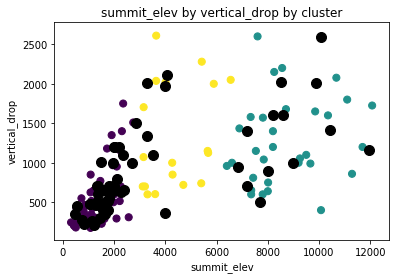

In [19]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['summit_elev'], ac['vertical_drop'], c='black', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('C:\\Users\\salman_pc\\Documents\\DATASCIENCE(SPRINGBOARD)\\GuidedCapStone\\figures/fig1.png',bbox_inches='tight')

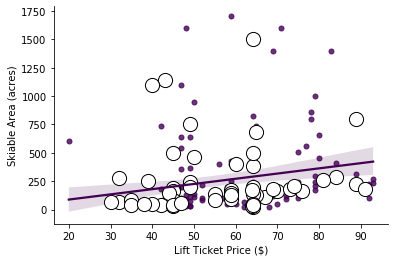

In [20]:
#"#440154FF" "#21908CFF" "#FDE725FF"
sns.regplot(x="AdultWeekend", y="SkiableTerrain_ac", data=df[(df['SkiableTerrain_ac']<25000)], color ="#440154FF",scatter_kws={"s": 25})
plt.scatter(x="AdultWeekend", y="SkiableTerrain_ac", data=ac, c='white',s=200,edgecolors='black')
sns.despine()
plt.xlabel('Lift Ticket Price ($)')
plt.ylabel('Skiable Area (acres)')
plt.savefig('C:\\Users\\salman_pc\\Documents\\DATASCIENCE(SPRINGBOARD)\\GuidedCapStone\\figures/fig2.png',bbox_inches='tight')

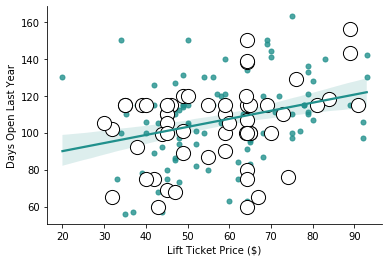

In [21]:
sns.regplot(x="AdultWeekend", y="daysOpenLastYear", data=df,color ="#21908CFF",scatter_kws={"s": 25})
sns.despine()
plt.scatter(x="AdultWeekend", y="daysOpenLastYear", data=ac, c='white',s=200,edgecolors='black')
plt.xlabel('Lift Ticket Price ($)')
plt.ylabel('Days Open Last Year')
plt.savefig('C:\\Users\\salman_pc\\Documents\\DATASCIENCE(SPRINGBOARD)\\GuidedCapStone\\figures/fig3.png',bbox_inches='tight')

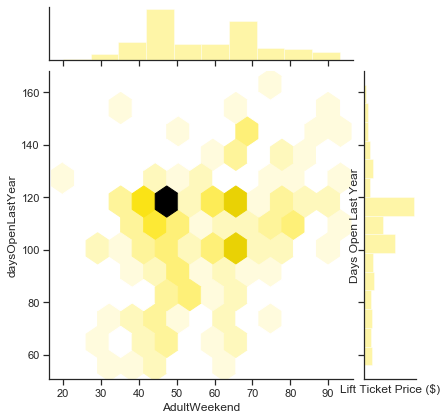

In [22]:
sns.set(style="ticks")
sns.jointplot(x=df['AdultWeekend'], y=df['daysOpenLastYear'], kind="hex", color="#FDE725FF")
sns.despine()
plt.xlabel('Lift Ticket Price ($)')
plt.ylabel('Days Open Last Year')
plt.savefig('C:\\Users\\salman_pc\\Documents\\DATASCIENCE(SPRINGBOARD)\\GuidedCapStone\\figures/fig4.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [24]:
!pip install joblib

In [25]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'models/regression_model_adultweekend.joblib') 

['models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [27]:
coeff_df = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])  
coeff_df['MAE'] = mean_absolute_error(y_test, y_pred)
coeff_df['ExpVar'] = explained_variance_score(y_test, y_pred)
coeff_df.to_csv('models/model_metrics.csv',index=False)